## Part 1: Pulse Rate Algorithm

### Contents
Fill out this notebook as part of your final project submission.

**You will have to complete both the Code and Project Write-up sections.**
- The [Code](#Code) is where you will write a **pulse rate algorithm** and already includes the starter code.
   - Imports - These are the imports needed for Part 1 of the final project. 
     - [glob](https://docs.python.org/3/library/glob.html)
     - [numpy](https://numpy.org/)
     - [scipy](https://www.scipy.org/)
- The [Project Write-up](#Project-Write-up) to describe why you wrote the algorithm for the specific case.


### Dataset
You will be using the **Troika**[1] dataset to build your algorithm. Find the dataset under `datasets/troika/training_data`. The `README` in that folder will tell you how to interpret the data. The starter code contains a function to help load these files.

1. Zhilin Zhang, Zhouyue Pi, Benyuan Liu, ‘‘TROIKA: A General Framework for Heart Rate Monitoring Using Wrist-Type Photoplethysmographic Signals During Intensive Physical Exercise,’’IEEE Trans. on Biomedical Engineering, vol. 62, no. 2, pp. 522-531, February 2015. Link

-----

### Code

In [1]:
import glob
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt, medfilt

Function to get the raw  data files from dataset

In [2]:
def LoadTroikaDataset():
    """
    Retrieve the .mat filenames for the troika dataset.

    Review the README in ./datasets/troika/ to understand the organization of the .mat files.

    Returns:
        data_fls: Names of the .mat files that contain signal data
        ref_fls: Names of the .mat files that contain reference data
        <data_fls> and <ref_fls> are ordered correspondingly, so that ref_fls[5] is the 
            reference data for data_fls[5], etc...
    """
    data_dir = "./datasets/troika/training_data"
    data_fls = sorted(glob.glob(data_dir + "/DATA_*.mat"))
    ref_fls = sorted(glob.glob(data_dir + "/REF_*.mat"))
    return data_fls, ref_fls

In [3]:
data_fls, ref_fls=LoadTroikaDataset()

In [4]:
data_fls

['./datasets/troika/training_data/DATA_01_TYPE01.mat',
 './datasets/troika/training_data/DATA_02_TYPE02.mat',
 './datasets/troika/training_data/DATA_03_TYPE02.mat',
 './datasets/troika/training_data/DATA_04_TYPE01.mat',
 './datasets/troika/training_data/DATA_04_TYPE02.mat',
 './datasets/troika/training_data/DATA_05_TYPE02.mat',
 './datasets/troika/training_data/DATA_06_TYPE02.mat',
 './datasets/troika/training_data/DATA_07_TYPE02.mat',
 './datasets/troika/training_data/DATA_08_TYPE02.mat',
 './datasets/troika/training_data/DATA_10_TYPE02.mat',
 './datasets/troika/training_data/DATA_11_TYPE02.mat',
 './datasets/troika/training_data/DATA_12_TYPE02.mat']

In [5]:
ref_fls

['./datasets/troika/training_data/REF_01_TYPE01.mat',
 './datasets/troika/training_data/REF_02_TYPE02.mat',
 './datasets/troika/training_data/REF_03_TYPE02.mat',
 './datasets/troika/training_data/REF_04_TYPE01.mat',
 './datasets/troika/training_data/REF_04_TYPE02.mat',
 './datasets/troika/training_data/REF_05_TYPE02.mat',
 './datasets/troika/training_data/REF_06_TYPE02.mat',
 './datasets/troika/training_data/REF_07_TYPE02.mat',
 './datasets/troika/training_data/REF_08_TYPE02.mat',
 './datasets/troika/training_data/REF_10_TYPE02.mat',
 './datasets/troika/training_data/REF_11_TYPE02.mat',
 './datasets/troika/training_data/REF_12_TYPE02.mat']

Functions to extract the PPG and Accelerometer data from a data file

In [6]:
def LoadTroikaDataFile(data_fl):
    """
    Loads and extracts signals from a troika data file.

    Usage:
        data_fls, ref_fls = LoadTroikaDataset()
        ppg, accx, accy, accz = LoadTroikaDataFile(data_fls[0])

    Args:
        data_fl: (str) filepath to a troika .mat file.

    Returns:
        numpy arrays for ppg, accx, accy, accz signals.
    """
    data = sp.io.loadmat(data_fl)['sig']
    return data[2:]

In [7]:
def LoadTroikaReferenceFile(ref_fl):
    """
    Loads and extracts signals from a troika reference file.

    Usage:
        data_fls, ref_fls = LoadTroikaDataset()
        ref_hr = LoadTroikaDataFile(ref_fls[0])

    Args:
        ref_fl: (str) filepath to a troika .mat file.

    Returns:
        numpy arrays for reference heart rates.
    """
    data = sp.io.loadmat(ref_fl)['BPM0']
    return data

Function to calculate average reference pulse rate

In [8]:
def avg_reference_pulserate(ref_fls):
    """
    Calculates average pulse rate per file 
    
    Args:
        ref_fls: (str) filepaths to a troika reference pulse rate .mat files.

    Returns:
        numpy arrays for average reference pulse rate per file.

    """
    avg_ref_pr=np.zeros(shape=(len(ref_fls),1))
    for i,fl in enumerate(ref_fls): 
        avg_ref_pr[i,:]=np.mean(sp.io.loadmat(fl)['BPM0'])
    return avg_ref_pr

In [9]:
def PPG_data(data_fl):
    """
    Loads combined PPG and Accelerometer data and 
    return PPG signals
    """
    data=LoadTroikaDataFile(data_fl)
    return data[0,:]

In [10]:
def Accelerometer_data(data_fl):
    """
    Loads combined PPG and Accelerometer data and 
    return Accelerometer signals
    """
    data=LoadTroikaDataFile(data_fl)
    return data[1:,:]

Plotting ppg data

### PPG Data Pre-processing

In [11]:
def BandpassFilter(sig,passband,fs):
    """
    Takes signal, bandpass filter range and sample frequency as the inputs 
    and returns filtered signal as the output
    """
    b,a=sp.signal.butter(5,passband, btype='bandpass',fs=fs)
    return sp.signal.filtfilt(b, a, sig)

Applying band pass filters to PPG signal

In [12]:
fs=125 # sampling rate from the TROIKA article
passband=[40/60,240/60] # Converting bpm to Hz

Lets visualize the filtered signals in frequency domain

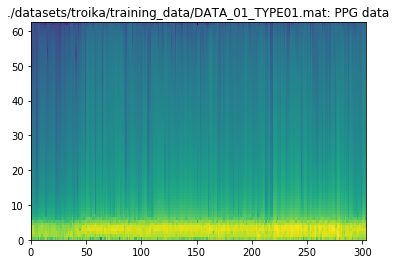

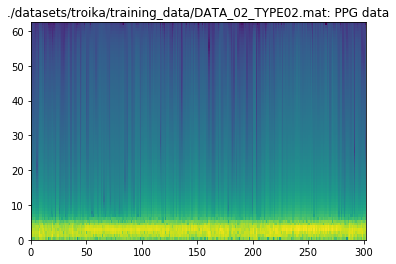

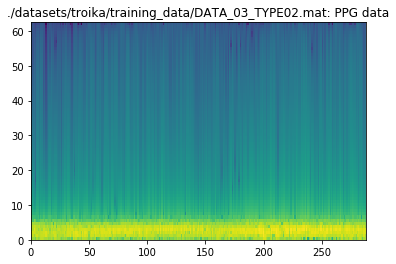

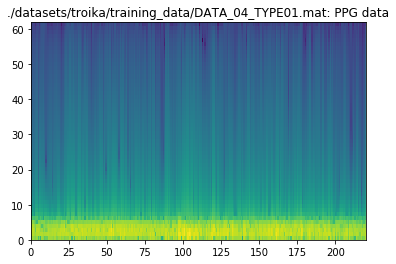

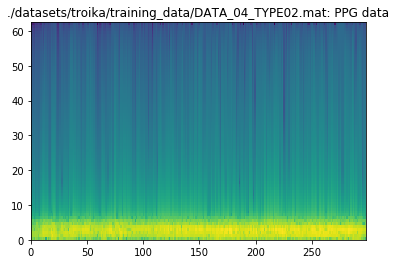

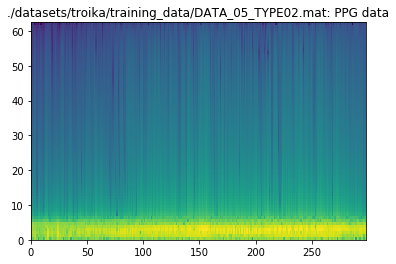

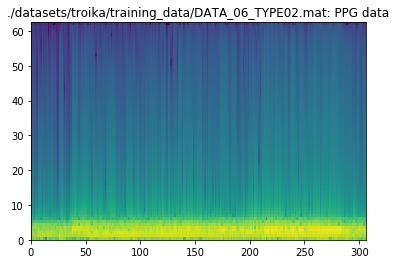

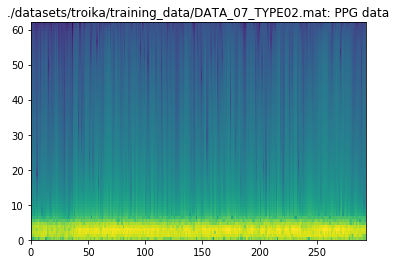

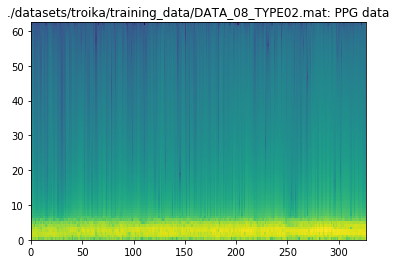

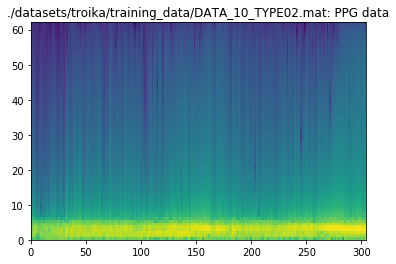

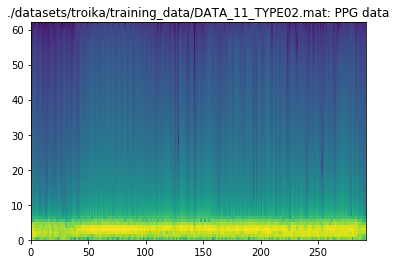

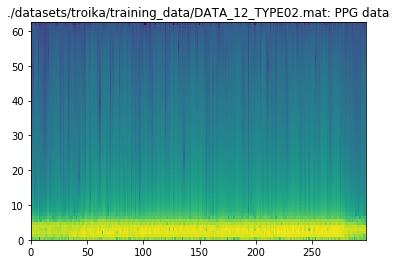

In [13]:
for i,fl in enumerate(data_fls):
    ppg_i=PPG_data(fl)
    ref_heart_rate=LoadTroikaReferenceFile(ref_fls[i])
    filt_sig_i=BandpassFilter(ppg_i,passband,fs)
    plt.figure(i)
    plt.specgram(filt_sig_i,NFFT=len(ref_heart_rate),Fs=fs,noverlap=0)
    plt.title(fl+ ': PPG data')
    plt.show()

Functions to calculate FFT magnitudes and frequencies for PPG and Accelerometer signal

In [14]:
def FFT_PPG(data_fl,ref_fl,fs,w_overlap,passband):
    
    """
    Computes FFT magnitude and frequencies for PPG signals

    Args:
        data_fl: filepath to a data .mat file
        ref_fl: filepath to a reference .mat file
        fs: sampling rate or frequency (Hz)
        passband: band pass frequency range
    Returns:
        fft_sig_ppg (tuple with list of FFT magnitudes array in the first element and frequencies in second element)
    """
    ppg_i=PPG_data(data_fl)
    ref_heart_rate=LoadTroikaReferenceFile(ref_fl)
    filt_ppg_i=BandpassFilter(ppg_i,passband,fs)
    
    c=len(ref_heart_rate)
    n=int(np.floor((len(filt_ppg_i)+w_overlap)/len(ref_heart_rate)))
    fftmag_ppg=[]
    fft_freq_ppg=np.fft.rfftfreq(n,1/fs)
    i=0
    while (i+n<len(filt_ppg_i)+w_overlap):
        fftmag_ppg.append(np.abs(np.fft.rfft(filt_ppg_i[i:i+n])))
        i=i+n
    #fftmag_ppg=np.abs(np.fft.rfft(filt_ppg_i))
    #fft_freq_ppg=np.fft.rfftfreq(len(filt_ppg_i),1/fs)
    #NFFT = 2**int(np.log(len(filt_ppg_i)/len(ref_heart_rate))/np.log(2))
    #NFFT=int(len(filt_ppg_i)/len(ref_heart_rate))
    #print (NFFT)
    #fft_sig_ppg=plt.specgram(filt_sig_i,NFFT=NFFT,Fs=fs,noverlap=0)
    #plt.clf()
    
    fft_sig_ppg=(fftmag_ppg,fft_freq_ppg)
    return fft_sig_ppg

In [15]:
def FFT_Accelerometer(data_fl,ref_fl,fs,w_overlap,passband):
    
    """
    Computes FFT magnitude and frequencies for accelerometer signals

    Args:
        data_fl: filepath to a data .mat file
        ref_fl: filepath to a reference .mat file
        fs: sampling rate or frequency (Hz)
        passband: band pass frequency range
    Returns:
        fft_sig_acc (tuple) with FFT magnitude of 3 accelerations (accx,accy,accz) and frequencies (numpy arrays) in the second element
        """
    
    acc=Accelerometer_data(data_fl)
    ref_heart_rate=LoadTroikaReferenceFile(ref_fl)
    filt_acc_x=BandpassFilter(acc[0],passband,fs)
    filt_acc_y=BandpassFilter(acc[1],passband,fs)
    filt_acc_z=BandpassFilter(acc[2],passband,fs)
    
    c=len(ref_heart_rate)
    n=int(np.floor((len(filt_acc_x)+w_overlap)/len(ref_heart_rate)))
    acc_mag_total=[]
    fftmag_acc_x=[]
    fftmag_acc_y=[]
    fftmag_acc_z=[]
    fft_freq_ppg=np.fft.rfftfreq(n,1/fs)
    i=0
    while (i+n<len(filt_acc_x)+w_overlap):
        fftmag_acc_x.append(np.abs(np.fft.rfft(filt_acc_x[i:i+n])))
        fftmag_acc_y.append(np.abs(np.fft.rfft(filt_acc_y[i:i+n])))
        fftmag_acc_z.append(np.abs(np.fft.rfft(filt_acc_z[i:i+n])))
        i=i+n
    

    fft_freq_acc=np.fft.rfftfreq(n,1/fs)
    fft_sig_acc=(fftmag_acc_x,fftmag_acc_y,fftmag_acc_z,fft_freq_acc)
    return fft_sig_acc

Function to find two dominant frequencies

In [16]:
def dominant_freq(sig_mag,sig_freq):
    
    """
    Computes Top two best dominant frequency

    Args:
        sig_mag: FFT magnitude of a signal (numpy array)
        sig_freq: FFT frequencies of a signal (numpy array)
    Returns:
        Top 3 best dominant frequencies
    """
    
    x=np.argsort(sig_mag)[::-1]
    max_freq_1,max_freq_2=sig_freq[x[0:2]]
    return max_freq_1,max_freq_2

In [17]:
def find_best_frequency(data_fl,ref_fl,fs,w_overlap,passband):
    
    """
    Computes best dominant frequency by comparing accelerometer and PPG signals

    Args:
        data_fls: filepath to data .mat files
        fs: sampling rate or frequency (Hz)
        passband: band pass frequency range
    Returns:
        best dominant frequency
    """
    
    
    fft_sig_ppg=FFT_PPG(data_fl,ref_fl,fs,w_overlap,passband)
    fft_sig_acc=FFT_Accelerometer(data_fl,ref_fl,fs,w_overlap,passband)
    window_size=len(fft_sig_ppg[0])
    s=2
    ppg_dom_freqs=np.zeros(shape=(window_size,s))
    acc_dom_freqs_x=np.zeros(shape=(window_size,s))
    acc_dom_freqs_y=np.zeros(shape=(window_size,s))
    acc_dom_freqs_z=np.zeros(shape=(window_size,s))
    best_freq=np.zeros(shape=(window_size,1))
    
    for i in range(window_size):
        
        acc_dom_freqs_x[i,:]=dominant_freq(fft_sig_acc[0][i],fft_sig_acc[3])
        acc_dom_freqs_y[i,:]=dominant_freq(fft_sig_acc[1][i],fft_sig_acc[3])
        acc_dom_freqs_z[i,:]=dominant_freq(fft_sig_acc[2][i],fft_sig_acc[3])
        ppg_dom_freqs[i,:]=dominant_freq(fft_sig_ppg[0][i],fft_sig_ppg[1])
        
        # select second best dominant frequency from PPG signal if dominant frequencies of accelerometer and PPG match
        if (acc_dom_freqs_x[i,0]==ppg_dom_freqs[i,0])or (acc_dom_freqs_y[i,0]==ppg_dom_freqs[i,0]) or (acc_dom_freqs_z[i,0]==ppg_dom_freqs[i,0]):       
            best_freq[i,:]=ppg_dom_freqs[i,1]
        else:
            best_freq[i,:]=ppg_dom_freqs[i,0]
            
    return best_freq

In [18]:
def plot_frequency(data_fl,ref_fl,fs):
    
    """
    Computes best dominant frequency by comparing accelerometer and PPG signals

    Args:
        data_fls: filepath to data .mat files
        fs: sampling rate or frequency (Hz)
        passband: band pass frequency range
    Returns:
        best dominant frequency
    """
    
    ref_heart_rate=LoadTroikaReferenceFile(ref_fl)
    fft_sig_ppg=FFT_PPG(data_fl,ref_fl,fs,passband)
    fft_sig_acc=FFT_Accelerometer(data_fl,ref_fl,fs,passband)
    window_size=len(fft_sig_ppg[0])
    
    ppg_dom_freqs=np.zeros(shape=(window_size,2))
    acc_dom_freqs_x=np.zeros(shape=(window_size,2))
    acc_dom_freqs_y=np.zeros(shape=(window_size,2))
    acc_dom_freqs_z=np.zeros(shape=(window_size,2))
    best_freq=np.zeros(shape=(window_size,1))
    
    for i in range(window_size):

        acc_dom_freqs_x[i,:]=dominant_freq(fft_sig_acc[0][i],fft_sig_acc[3])
        acc_dom_freqs_y[i,:]=dominant_freq(fft_sig_acc[1][i],fft_sig_acc[3])
        acc_dom_freqs_z[i,:]=dominant_freq(fft_sig_acc[2][i],fft_sig_acc[3])
        ppg_dom_freqs[i,:]=dominant_freq(fft_sig_ppg[0][i],fft_sig_ppg[1])
        
        # select second best dominant frequency from PPG signal if dominant frequencies of accelerometer and PPG match
        if (acc_dom_freqs_x[i,0]==ppg_dom_freqs[i,0])or (acc_dom_freqs_y[i,0]==ppg_dom_freqs[i,0]) or (acc_dom_freqs_z[i,0]==ppg_dom_freqs[i,0]): 
            best_freq[i,:]=ppg_dom_freqs[i,1]
        else:
            best_freq[i,:]=ppg_dom_freqs[i,0]
            
            
    plt.figure(1)
    plt.plot(ref_heart_rate/60,'--v')
    plt.plot(best_freq,'--p')
    
    plt.title('First frequency')
    
    plt.figure(2)
    plt.plot(ref_heart_rate/60,'--v')
    plt.plot(best_freq,'--p')
    plt.title('Second frequency')
            
    return best_freq

In [19]:
def confidence_estimation(mag,freq,pulse_rate,window):
    """
    Computes confidence estimates.

    Args:
        mag: FFT magnitude of a signal
        freq: FFT frequencies of a signal
        pulse_rate: esitmated pulse rate
        window= window around pulse rate estimate (in Hz)

    Returns:
        conf_est: Sum of frequency spectrum around pulse rate estimate/total sum of entire spectrum
    """
    pulse_freq=pulse_rate/60
    selected_mag=mag[(freq<pulse_freq+window) & (freq>pulse_freq-window)]
    conf_est=np.sum(selected_mag)/np.sum(mag)
    return conf_est
    

In [20]:
def smoothing(data,window_len):
    return scipy.signal.medfilt(data, window_len)

In [21]:
def AggregateErrorMetric(pr_errors, confidence_est):
    """
    Computes an aggregate error metric based on confidence estimates.

    Computes the MAE at 90% availability. 

    Args:
        pr_errors: a numpy array of errors between pulse rate estimates and corresponding 
            reference heart rates.
        confidence_est: a numpy array of confidence estimates for each pulse rate
            error.

    Returns:
        the MAE at 90% availability
    """
    # Higher confidence means a better estimate. The best 90% of the estimates
    #    are above the 10th percentile confidence.
    percentile90_confidence = np.percentile(confidence_est, 10)

    # Find the errors of the best pulse rate estimates
    best_estimates = pr_errors[confidence_est >= percentile90_confidence]

    # Return the mean absolute error
    return np.mean(np.abs(best_estimates))

In [22]:
def Evaluate():
    """
    Top-level function evaluation function.

    Runs the pulse rate algorithm on the Troika dataset and returns an aggregate error metric.

    Returns:
        Pulse rate error on the Troika dataset. See AggregateErrorMetric.
    """
    # Retrieve dataset files
    data_fls, ref_fls = LoadTroikaDataset()
    errs, confs = [], []
    for data_fl, ref_fl in zip(data_fls, ref_fls):
        # Run the pulse rate algorithm on each trial in the dataset
        errors, confidence = RunPulseRateAlgorithm(data_fl, ref_fl)
        errs.append(errors)
        confs.append(confidence)
        # Compute aggregate error metric
            
    errs = np.hstack(errs)
    confs = np.hstack(confs)
    return AggregateErrorMetric(errs, confs)

In [23]:
def RunPulseRateAlgorithm(data_fl, ref_fl):
    # Load data using LoadTroikaDataFile
    passband=[40/60,240/60]
    w_overlap=0
    ppg, accx, accy, accz = LoadTroikaDataFile(data_fl)
    ref_heart_rate=LoadTroikaReferenceFile(ref_fl)
    fft_ppg=FFT_PPG(data_fl,ref_fl,fs,w_overlap,passband)
    
    # Compute pulse rate estimates and estimation confidence.
    pulse_rates_0=pd.Series(60*find_best_frequency(data_fl,ref_fl,fs,w_overlap,passband)[:,0])
    pulse_rates=pulse_rates_0.ewm(com=5).mean().values
    
   
    # Return per-estimate mean absolute error and confidence as a 2-tuple of numpy arrays.
    errors=np.abs(pulse_rates-ref_heart_rate[:,0])
    confidence=[]
    for i in range(len(fft_ppg[0])):
        confidence.append(confidence_estimation(fft_ppg[0][i],fft_ppg[1],pulse_rates[i],window=0.6))
    
    return errors, confidence

In [24]:
Evaluate()

21.962752457767678

-----
### Project Write-up

Answer the following prompts to demonstrate understanding of the algorithm you wrote for this specific context.

> - **Code Description** - Include details so someone unfamiliar with your project will know how to run your code and use your algorithm. 
> - **Data Description** - Describe the dataset that was used to train and test the algorithm. Include its short-comings and what data would be required to build a more complete dataset.
> - **Algorithhm Description** will include the following:
>   - how the algorithm works
>   - the specific aspects of the physiology that it takes advantage of
>   - a describtion of the algorithm outputs
>   - caveats on algorithm outputs 
>   - common failure modes
> - **Algorithm Performance** - Detail how performance was computed (eg. using cross-validation or train-test split) and what metrics were optimized for. Include error metrics that would be relevant to users of your algorithm. Caveat your performance numbers by acknowledging how generalizable they may or may not be on different datasets.

Your write-up goes here...

**Code Description**
In order to execute the code, run RunPulseRateAlgorithm with data file and reference heart rates file as the inputs or Evaluate function can be executed to run it for all the data files.

**Data Description**
The signal data  and reference heart rate can be extracted from Troika dataset using LoadTroikaDataFile and LoadTroikaReferenceFile functions, respectively. As this is not machine learning model exercise, the entire dataset was used. There was no test-train split. 
Data size: Total 12 data files were used in this model. 
Type of signals: The signal data comprised of PPG signals and accelerometer signals in x,y and z directions.
Shortcoming: Sampling rate (fs=125)was not given in the dataset. I had to read Troika's paper to get sampling rate. 

**Algorithhm Description**
Pulse rate estimation algorithm has the following steps:

1) Apply the band-pass filter. Choose proper frequency range.

2) Split the PPG signals and accelerometer signals into short segments.

3) Apply fourier transformation to both signals.

4) Choose frequency corresponding to maximum PPG signals magnitude. Also check if the same frequency is the dominant one in accelerometer signal as well. If yes, then pick the frequency corresponding to second max PPG signals magnitude.

5) convert frequency to BPM by multiplying factor of 60.

6) After getting BPMs for all the segments, apply exponential weighted average to smooth the estimated BPMs.

7) Compare the estimated BPMs againast reference pulse rates.


Algorithm is not able to produce very accurate pulse rates specially for initial segments.This is the weakness of this algorithm.

**Algorithm Performance**

The absolute errors between the estimated and reference pulse rates were estimated. Confidence scores were also estimated and finally aggregated error metric was calculated taking into account errors and their confidence scores.
The total mean absolute error (MAE) calculation was based on best 90% (above the 10th percentile confidence) of the estimates. The final MAE came out to be 21.96 using 12 data files.There were 11 subjects and one subject (subject 4) was tested twice. 


-----
### Next Steps
You will now go to **Test Your Algorithm** to apply a unit test to confirm that your algorithm met the success criteria. 